# Linear Regression

Magic Formula:

$$Y=\beta_0 + \beta_1 X + \epsilon$$

**What does each term mean?**

- Y is the response
- X is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for X
- $\epsilon$ is the error term

$\beta_0$ and $\beta_1$ are called the **model coefficients**

## Import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

## Import Dataset

In [2]:
from sklearn.datasets import load_boston
boston_df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston_df['MEDV'] = load_boston().target
boston_df['LOGMEDV'] = np.log(boston_df.MEDV +1)
Y = boston_df.MEDV

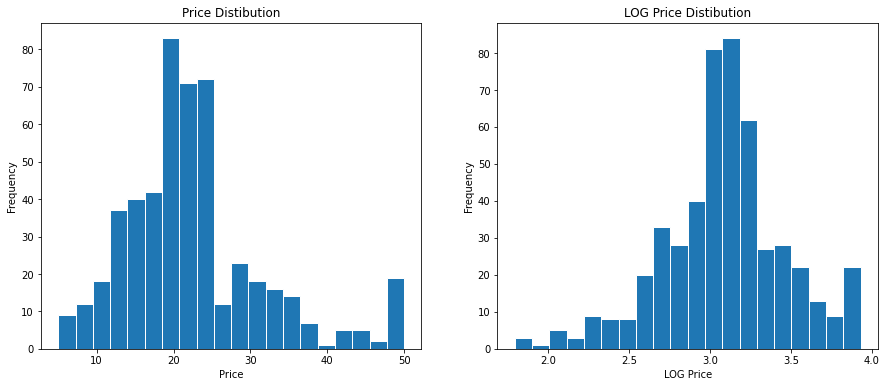

In [4]:
# Plot Price Distribution
plt.subplot(1,2,1)
boston_df.MEDV.plot.hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Price')
plt.title('Price Distibution')
plt.subplot(1,2,2)
boston_df.LOGMEDV.plot.hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('LOG Price')
plt.title('LOG Price Distibution')
plt.show()

### Visualize Each independent features

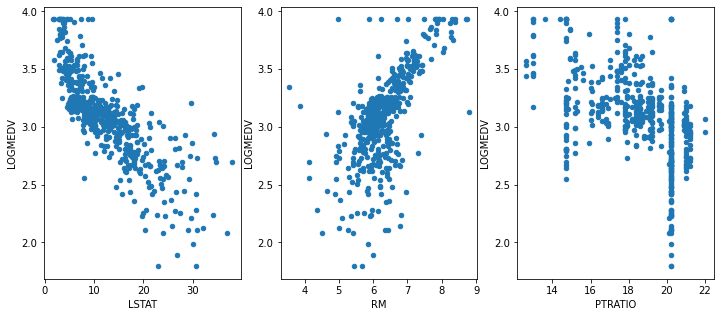

In [5]:
ax=[]
[ax.append(plt.subplot(1,3,i+1)) for i in range(3)]
    
boston_df.plot(kind='scatter', x='LSTAT', y='LOGMEDV', ax=ax[0], figsize=(12,5))
boston_df.plot(kind='scatter', x='RM', y='LOGMEDV', ax=ax[1])
boston_df.plot(kind='scatter', x='PTRATIO', y='LOGMEDV',ax=ax[2])
plt.show()

## Ordinary Least Square Method:

General Formula:
    
$$y=\beta_0+\beta_1 X+\epsilon$$

$$\beta_1=\frac{\sum{(X-\bar X)(y-\bar y)}}{\sum{(X-\bar X)^2}}$$

$$\beta_0 = \bar y - \bar X $$


another way of representation is :
    
$$\beta_1 = \frac{NB-XY}{NA-X^2}$$

Where 

N = No of observvation

$A = \sum(X^2)$

$B=\sum(Xy)$

$C=\sum(y^2)$

$X=\sum(x)$ , $Y=\sum(y)$

In [6]:
#Take an Example
yr_x = [2,3,5,13,8,16,11,1,9]
salary_y = [15, 28,42,64, 50,90,58,8,54]
df = pd.DataFrame({'yr':yr_x,'salary':salary_y})
df['X-X_hat'] = df.yr-np.mean(df.yr)
df['y-y_hat'] = df.salary - np.mean(df.salary)
df['(X-X_hat)(y-y_hat)'] = df['X-X_hat']*df['y-y_hat']
df['(X-X_hat)^2'] = df['X-X_hat']**2
df.head()

,yr,salary,X-X_hat,y-y_hat,(X-X_hat)(y-y_hat),(X-X_hat)^2
0,2,15,-5.555556,-30.444444,169.135802,30.864198
1,3,28,-4.555556,-17.444444,79.469136,20.753086
2,5,42,-2.555556,-3.444444,8.802469,6.530864
3,13,64,5.444444,18.555556,101.024691,29.641975
4,8,50,0.444444,4.555556,2.024691,0.197531


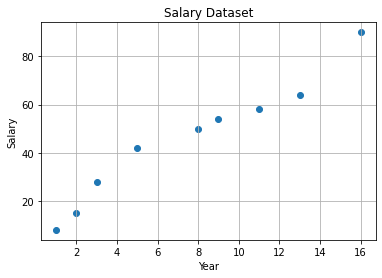

In [7]:
#Plotting Data Scatter Plot
plt.scatter(df.yr,df.salary)
plt.title('Salary Dataset')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid()
plt.show()

### Finding Slope

In [8]:
beta_1 = sum(df['(X-X_hat)(y-y_hat)'])/sum(df['(X-X_hat)^2'])
beta_0 = np.mean(df.salary) - beta_1*np.mean(df.yr)
print(f'Slope of regressor line: {beta_1:1.3}')
print(f'The intercept b is: {beta_0:1.3}')

Slope of regressor line: 4.8
The intercept b is: 9.18


Fitted Line: $y = 4.8 X + 9.18$

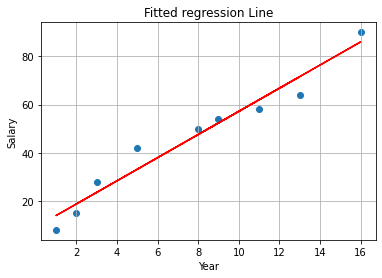

In [9]:
#Plotting fitted Line
plt.scatter(df.yr,df.salary)
plt.plot(df.yr, beta_0+beta_1*df.yr,'r')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid()
plt.title('Fitted regression Line')
plt.show()


## Normal Equation Function(or  Matrix Form)

$$\theta=(X^T X)^{-1} X^T y$$

Linear Regression using Normal Equation Method:

In [10]:
#Create Normal Equation Function
def NormalEquation(X,y):
    X = np.array([np.ones(len(y)),X]).T
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [11]:
NormalEquation(df.yr,df.salary)

array([9.18088386, 4.7995889 ])

## Gradient Descent Method

 **Hypothesis:** $h_{\theta}(x) = \theta_0 +\theta_1 x$
 
 **Parameters:** $\theta_0, \theta_1$
 
 **Cost Function:**  $J(\theta_0,\theta_1)=\frac{1}{2m} \sum_{i=1}^m((h_{\theta}(x^{(i)}) - y^{(i)})^2$
 
 **Goal:**      $minimize -->    J(\theta_0, \theta_1)$

In [12]:
#Initialize random theta Values
theta = np.zeros(2)

#Create feature matrix
X = np.array([np.ones(len(df.yr)),df.yr]).T
#Initial prediction
prediction = X@theta
#define Cost function
def cost(theta,X,y):
    prediction = X@theta
    sq_error = np.square(prediction-y)
    return np.sum(sq_error)/(2*y.size)

In [13]:
init_cost = cost(theta,X,df.salary)

In [14]:
print(f'Initial Cost: {init_cost}')

Initial Cost: 1322.9444444444443


Gradient Descent Iteration:

$$\theta_0^1=\theta_0^1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}) $$

$$\theta_1^1=\theta_1^1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}). x^{(i)}$$

In [15]:
def gradientDescent(X,y,theta,alpha,num_iters):
    X = np.array([np.ones(len(y)),X]).T
    m = y.size
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        y_hat = X@theta
        theta = theta - (alpha/m) * np.dot(X.T, y_hat-y)
        cost_history[i] = cost(theta,X,y)
    return theta, cost_history

In [16]:
theta, cost_history = gradientDescent(df.yr,df.salary,[0,0],0.008,3000)

In [17]:
print(f'So, Regression line, y = {theta[0]:.3} + {theta[1]:.3} * X')

So, Regression line, y = 9.17 + 4.8 * X


In [18]:
# So Predicted Values are :
y_hat = X@theta
print(np.array([y_hat]).T)

[[18.77399095]
 [23.57427792]
 [33.17485186]
 [71.57714762]
 [47.57571277]
 [85.97800853]
 [61.97657368]
 [13.97370398]
 [52.37599974]]


### Hyperparameter optimization

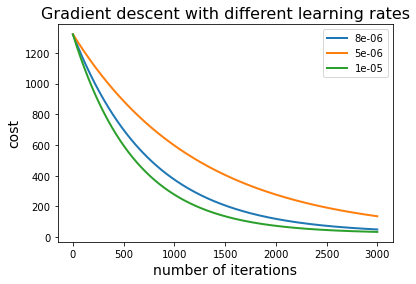

In [19]:
num_iters = 3000
learning_rates = [0.000008, 0.000005, 0.00001]
for lr in learning_rates:
    theta, cost_history = gradientDescent(df.yr, df.salary, [0,0], lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(learning_rates)

## Linear Regression using sklearn

In [20]:
#import Linear Regression module
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array([df.yr]).T,df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(f"Intercept: {lr.intercept_}")
print(f'Slope: {lr.coef_}')

Intercept: 9.180883864337112
Slope: [4.7995889]


## Interpretation of Ordinary Least Square Regression Results

### Interpretation

- **Intercept** = 36.4911 This is what the value of our y (dependent variable) would be if the gradient had a value of 0.
- **Coefficient (RM)** = For every unit increase in x, y increases by 3800 dollars.
- **R-Squared (0.741)** =  74.1% of the variation in our y variable is “explained” by the x variable in this model.
- **p-value** The p-value is below 0.05%, denoting statistical significance of the regression at the 5% level.
- **The Null-Hypothesis**:  
    - H(0) says that there is no association between the DV and the IV. 
    - When the p-value is < 0.05 then we can reject the null-hypothesis and say that there is an association between the DV and the IV.
    - When p-value is < 0.05 then there is a relationship between DV and IV

### R Squared

R Squared = Explained Variance/ Total Variance

$$R^2 = \frac{\sum(\hat y -\bar y)^2}{\sum(y -\bar y)^2}$$

$$Adjusted  R^2 = 1-\frac{(1-R^2)(n-1)}{n-k-1}$$
where 

n =no of observation

k = no of independent variable

In [22]:
import statsmodels.api as sm

X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV'],axis = 1))
y = boston_df.MEDV
lm = sm.OLS(y,X).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 03 May 2020   Prob (F-statistic):          6.72e-135
Time:                        18:56:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
import statsmodels.api as sm

X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV'],axis = 1))
y = boston_df.LOGMEDV
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGMEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 03 May 2020   Prob (F-statistic):          2.19e-157
Time:                        18:56:11   Log-Likelihood:                 157.98
No. Observations:                 506   AIC:                            -288.0
Df Residuals:                     492   BIC:                            -228.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0801      0.193     21.125      0.000       3.701       4.460
CRIM          -0.0093      0.001     -7.512      0.000      -0.012      -0.007
ZN             0.0012      0.001      2.224      0.027       0.000       0.002
INDUS          0.0022      0.002      0.957      0.339      -0.002       0.007
CHAS           0.0966      0.033      2.963      0.003       0.033       0.161
NOX           -0.7422      0.145     -5.134      0.000      -1.026      -0.458
RM             0.0902      0.016      5.701      0.000       0.059       0.121
AGE            0.0002      0.000      0.333      0.739      -0.001       0.001
DIS           -0.0476      0.008     -6.302      0.000      -0.062      -0.033
RAD            0.0135      0.003      5.372      0.000       0.009       0.018
TAX           -0.0006      0.000     -4.147      0.000      -0.001      -0.000
PTRATIO       -0.0366      0.005     -7.399      0.000      -0.046      -0.027
B              0.0004      0.000      3.909      0.000       0.000       0.001
LSTAT         -0.0273      0.002    -14.200      0.000      -0.031      -0.023
==============================================================================
Omnibus:                       65.404   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.896
Skew:                           0.553   Prob(JB):                     3.26e-50
Kurtosis:                       6.096   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Discussion
Using LOGMEDV as dependent variable R squared value is improved. It signifies IV is somewhat in log sclae

INDUS and AGE features are having high p-value. This signifies they have less importance on DV.

Lets drop these feature and check...

In [24]:
import statsmodels.api as sm

X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV','INDUS','AGE'],axis = 1))
y = boston_df.LOGMEDV
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGMEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     168.7
Date:                Sun, 03 May 2020   Prob (F-statistic):          2.16e-159
Time:                        18:56:11   Log-Likelihood:                 157.45
No. Observations:                 506   AIC:                            -290.9
Df Residuals:                     494   BIC:                            -240.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0643      0.192     21.173      0.000       3.687       4.441
CRIM          -0.0094      0.001     -7.559      0.000      -0.012      -0.007
ZN             0.0011      0.001      2.112      0.035    7.53e-05       0.002
CHAS           0.1004      0.032      3.102      0.002       0.037       0.164
NOX           -0.6928      0.134     -5.174      0.000      -0.956      -0.430
RM             0.0899      0.015      5.839      0.000       0.060       0.120
DIS           -0.0498      0.007     -7.083      0.000      -0.064      -0.036
RAD            0.0128      0.002      5.311      0.000       0.008       0.017
TAX           -0.0005      0.000     -4.142      0.000      -0.001      -0.000
PTRATIO       -0.0359      0.005     -7.341      0.000      -0.045      -0.026
B              0.0004      0.000      3.912      0.000       0.000       0.001
LSTAT         -0.0269      0.002    -14.972      0.000      -0.030      -0.023
==============================================================================
Omnibus:                       64.996   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.707
Skew:                           0.547   Prob(JB):                     3.58e-50
Kurtosis:                       6.099   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Discussion:

These two features have less importance since R squared value is not altered.

## Assumptions and Checking the Model

### Assumptions

1. Linear Relationship between IV and DV
2. There must be no correlation among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.
3. The error terms must possess constant variance. Absence of constant variance leads to heteroskedestacity.
4. The error terms must be uncorrelated i.e. error at ∈t must not indicate the at error at ∈t+1. Presence of correlation in error terms is known as Autocorrelation. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.
5. The dependent variable and the error terms must possess a normal distribution.

### Detecting Multicollinearity - VIF

**Note:** Multicollinearity isn't so much of a problem if you're main focus is prediction. 

**Why is this a problem:** 
- When two variables are correlated with each other, then they "move together". 
- This is hard for your linear regression model to interpret the exact change of your DV's. 
- It doesn't know which IV is **responsible** for the change in the DV. 
- βi coefficients will be less precise.
- It's harder to accurately interpret the coefficients 

### Reference
- VIF = 1 (Not correlated)
- 1 < VIF < 5 (Moderately correlated)
- VIF >=5 (Highly correlated)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = boston_df.drop(["MEDV", "LOGMEDV"],axis=1).assign(const=1)

pd.Series([variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])],index=X_vif.columns)

CRIM         1.792192
ZN           2.298758
INDUS        3.991596
CHAS         1.073995
NOX          4.393720
RM           1.933744
AGE          3.100826
DIS          3.955945
RAD          7.484496
TAX          9.008554
PTRATIO      1.799084
B            1.348521
LSTAT        2.941491
const      585.265238
dtype: float64

### Get Necessary Model Parameters

In [26]:
X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV'],axis=1))
y = boston_df.MEDV
#y = boston_df.LOGMEDV
lm = sm.OLS(y,X).fit()

In [27]:
# fitted Values
fitted_y = lm.fittedvalues
# Model Residuals
res = lm.resid
# Nomalized Residuals
res_norm = lm.get_influence().resid_studentized_internal
# Leverage, from statsmodels internals
leverage = lm.get_influence().hat_matrix_diag
# Cook's Distance, from statsmodels internals
cooks = lm.get_influence().cooks_distance[0]

#### Detecting Heteroskedestacity - Residual Plot

Homescedasticity means the errors exhibit constant variance. **This is a key assumption of linear regression.**

Heteroscedasticity, on the other hand, is what happens when errors show some sort of growth. 
It's not Homescedastic if there is a pattern like: 
- quadratic shaped
- funnel shaped 

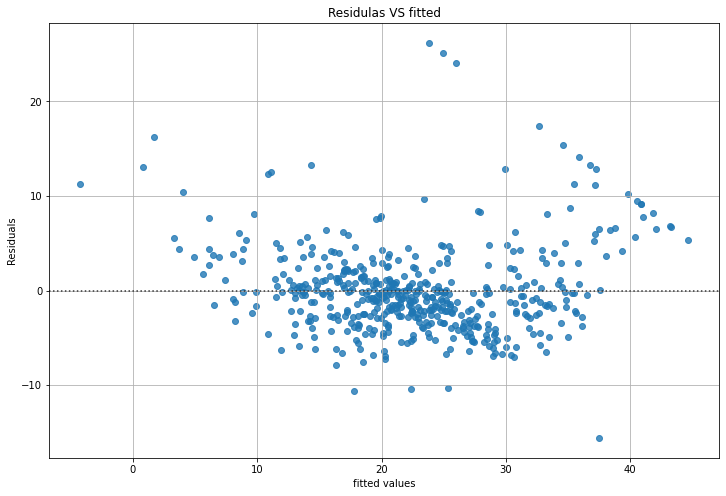

In [28]:
plt.figure(figsize=(12,8))
sns.residplot(fitted_y,boston_df.MEDV)
plt.grid()
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.title('Residulas VS fitted')
plt.show()

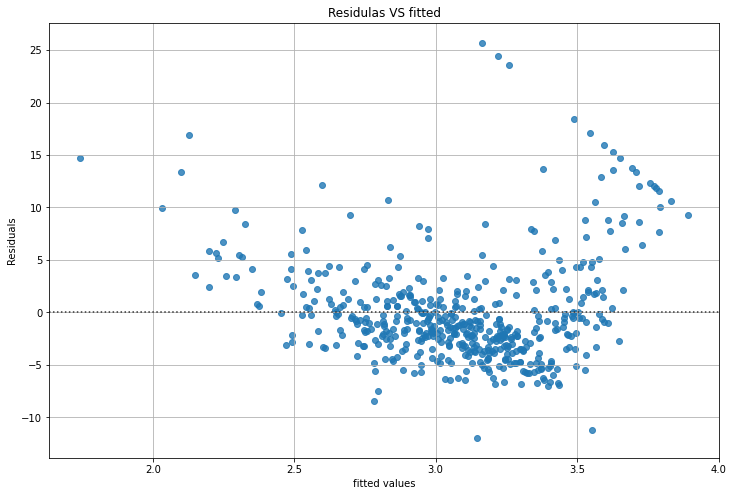

In [29]:
X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV'],axis=1))
y = boston_df.LOGMEDV
lm = sm.OLS(y,X).fit()
fitted_y = lm.fittedvalues
plt.figure(figsize=(12,8))
sns.residplot(fitted_y,boston_df.MEDV)
plt.grid()
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.title('Residulas VS fitted')
plt.show()

#### Detecting Linearity, Normal Distribution of Residuals & Zero Mean

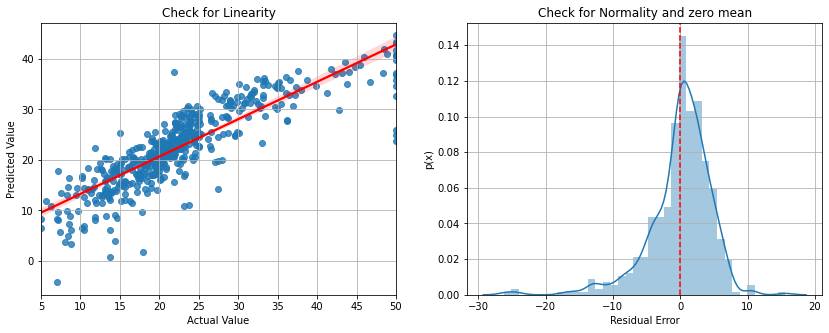

In [30]:
X = sm.add_constant(boston_df.drop(['MEDV', 'LOGMEDV'],axis=1))
y = boston_df.MEDV
lm = sm.OLS(y,X).fit()
fitted_y = lm.fittedvalues
# Regression Line Plot
plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
sns.regplot(boston_df.MEDV,fitted_y,line_kws={'color':'r'},ax=ax1)
plt.title('Check for Linearity')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.grid()
# Check for Residual Normality and Mean
ax2 = plt.subplot(122)
sns.distplot((fitted_y-boston_df.MEDV),ax=ax2)
plt.axvline((fitted_y-boston_df.MEDV).mean(), color='r', linestyle='--')
plt.grid()
plt.xlabel('Residual Error')
plt.ylabel('p(x)')
plt.title('Check for Normality and zero mean')
plt.show()

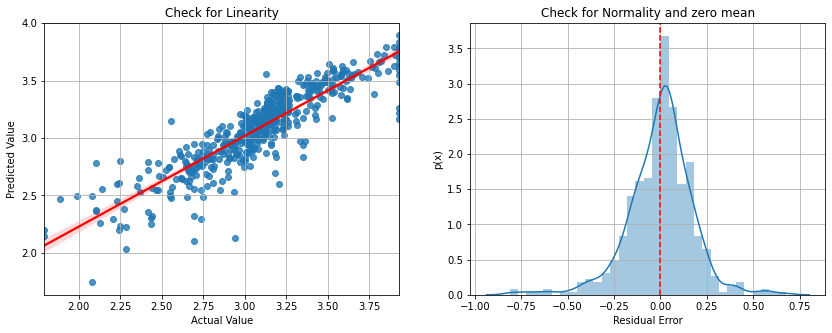

In [31]:
# Same Plot with LOGMEDV as response variable
y = boston_df.LOGMEDV
lm = sm.OLS(y,X).fit()
fitted_y = lm.fittedvalues
# Regression Line Plot
plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
sns.regplot(boston_df.LOGMEDV,fitted_y,line_kws={'color':'r'},ax=ax1)
plt.title('Check for Linearity')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.grid()
# Check for Residual Normality and Mean
ax2 = plt.subplot(122)
sns.distplot((fitted_y-boston_df.LOGMEDV),ax=ax2)
plt.axvline((fitted_y-boston_df.LOGMEDV).mean(), color='r', linestyle='--')
plt.grid()
plt.xlabel('Residual Error')
plt.ylabel('p(x)')
plt.title('Check for Normality and zero mean')
plt.show()

__Conclusion:__Log Transformed response variable is giving better results

### Detecting Normal Distibution of Residuals -- QQ Plot

This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are lined well on the straight dashed line.

#### Why error terms should be normally distributed? 
For parameter estimate (i.e. estimating the βi’s) we don't need that assumption. But, if it is not a normal distribution, some of those hypotheses tests which we will be doing as part of diagnostics may not be valid. 
For example:  To check whether the Beta (the regression coefficient) is significant or not, I'll do a T-test. So, if my error is not a normal distribution, then the statistic I derive may not be a T-distribution. 

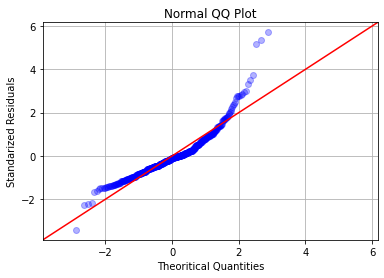

In [32]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(res_norm)
QQ.qqplot(line='45',alpha=0.3)
plt.grid()
plt.xlabel('Theoritical Quantities')
plt.ylabel('Standarized Residuals')
plt.title('Normal QQ Plot')
plt.show()

## Modeling 

1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression

### Simple Linear Regression:

In [33]:
X = boston_df[['LSTAT']]
y = boston_df.LOGMEDV

# Spilting data into Train/Test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
# initialize Linear Regression Model
lr = LinearRegression()
# Fit the Model
lr.fit(X_train,y_train)
# Preddiction
prediction = lr.predict(X_test)

In [35]:
r2 = r2_score(y_test,prediction)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mae = mean_absolute_error(y_test,prediction)

print(f'R Squared: {r2:0.3}')
print(f'Root Mean Square Error: {rmse:0.3}')
print(f'Mean Absolute Error: {mae:0.3}')

result = pd.DataFrame({'Model': ['Simple'],'R Squared': [r2], 'MSE':[rmse], 'MAE': [mae]})

R Squared: 0.666
Root Mean Square Error: 0.215
Mean Absolute Error: 0.161


### Multiple Regression

In [36]:
X = boston_df.drop(['MEDV', 'LOGMEDV'], axis=1)
y = boston_df.LOGMEDV

# Spilting data into Train/Test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

# initialize Linear Regression Model
lr = LinearRegression()
# Fit the Model
lr.fit(X_train,y_train)
# Preddiction
prediction = lr.predict(X_test)

r2 = r2_score(y_test,prediction)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mae = mean_absolute_error(y_test,prediction)

print(f'R Squared: {r2:0.3}')
print(f'Root Mean Square Error: {rmse:0.3}')
print(f'Mean Absolute Error: {mae:0.3}')

result = result.append(pd.DataFrame({'Model': ['Multiple'],'R Squared': [r2], 'MSE':[rmse], 'MAE': [mae]}))

R Squared: 0.745
Root Mean Square Error: 0.188
Mean Absolute Error: 0.126


### Polynomial Regression

Polynomial regression is useful because it allows you to fit a model to **nonlinear trends**.

It creates **new interaction features** in your dataset by:
- Multiplying features together
- Squaring features
- Cubing features
- Etc..

#### Example
You have a matrix [a,b] and want to perform a polynomial regression of degree=2
- new matrix: [1, a, b, a^2, ab, b^2]

In [37]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

poly = LinearRegression()
poly.fit(X_train_poly,y_train)
prediction = poly.predict(X_test_poly)

r2 = r2_score(y_test,prediction)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mae = mean_absolute_error(y_test,prediction)

print(f'R Squared: {r2:0.3}')
print(f'Root Mean Square Error: {rmse:0.3}')
print(f'Mean Absolute Error: {mae:0.3}')

result = result.append(pd.DataFrame({'Model': ['Polynomial'],'R Squared': [r2], 'MSE':[rmse], 'MAE': [mae]}))

R Squared: 0.813
Root Mean Square Error: 0.161
Mean Absolute Error: 0.117


In [38]:
# Results Comparision
result

,Model,R Squared,MSE,MAE
0,Simple,0.665508,0.215391,0.160549
0,Multiple,0.745285,0.187958,0.125992
0,Polynomial,0.812506,0.161261,0.117015


## Summary

Linear Regression is a powerful, simple, and widely used model. It's great for both predictions and interpretations. Here are some things to keep in mind:

- If all you care about is **prediction**, then correlated features may not be a big deal. 
- If you care about **interpretability** your features must be independent.
- Look at Adjusted R2 when evaluating the performance, it only uses important features for its calculations, whereas R2 will always increase with each addtional new feature.
- Always check the **assumptions** when you are trying to **interpret** the coefficients, OR ELSE your interpretations will be unreliable. 
